In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Loading Dataset
dataset = pd.read_csv('datasets/winequality-red.csv', sep = ';')
print('Dataset shape: {}'.format(dataset.shape))

Dataset shape: (1599, 12)


In [3]:
# Describe Dataset
X = dataset.drop(['quality'], axis=1)
Y = dataset['quality']
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


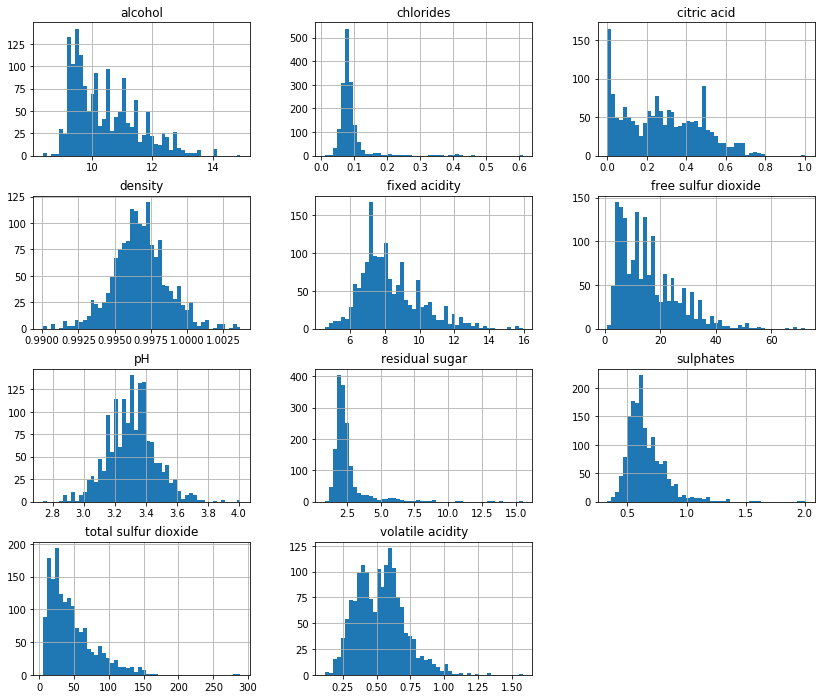

In [4]:
X.hist(figsize = (14, 12), bins = 50)
# 'figsize' rappresenta la dimensione delle figura (altezza, larghezza)
# mentre 'bins' la dimensione delle 'sbarrette'
plt.show()

In [5]:
# Conta i vini che hanno la stessa qualità
dataset.groupby(['quality']).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [6]:
# IMPORT FOR LEARNING

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [7]:
# prepare configuration for cross validation test harness
num_folds = 10

# Definisco una funzione 'cross_validation' perché mi servirà uguale dopo
def cross_validation(X, Y):
    # Prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('AB', AdaBoostClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('DT', DecisionTreeClassifier()))

    # Evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        k_fold = KFold(num_folds, random_state = seed)
        cv_result = cross_val_score(model, X, Y, cv = k_fold, scoring = scoring)
        results.append(cv_result)
        names.append(name)
        msg = "{} {:0.4} ({:0.4})".format(name,cv_result.mean(), cv_result.std())
        print(msg)

    # Boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
cross_validation(X, Y)

NameError: name 'seed' is not defined

In [ ]:
# Normalizzazione dei valori
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
X = rescaledX


cross_validation(X, Y)